In [1]:
from IPython.display import HTML
css_file = './custom.css'
HTML(open(css_file, "r").read())

# Regularized Regression

© 2018 Daniel Voigt Godoy

## 1. Definition

Regularization is a way of ***constraining*** the weights of the model.

### 1.1 Why regularize a model?
A sufficiently complex, yet unconstrained, model may learn weights that fit the data ***perfectly***, but this is no good, as data is typically ***noisy***.

If left unchecked, a model may give more importance to some weights to "explain" the noise better, so much so that these ***weights will be over-represented***. 

Hence the need for a ***constraining the weights***.

### 1.2 How to regularize a model?

The way regularization constrains the model is by ***adding*** an extra term ***to the cost function***.

So, the cost function will have to take into consideration the weights as well, instead of the ***prediction error*** alone (which is given by the ***loss function***).

This is the fundamental difference between ***cost*** and ***loss*** functions:

1. ***Loss Function*** is computed on errors of predictions ***alone***
2. ***Cost Function*** may add some other term, like ***regularization term***, to the ***loss function***

<center>
    <h3>Cost Function = Loss Function + Regularization Term</h3>
</center>

### 1.3 What is the regularization term?

The regularization term is nothing else than the ***distance*** of the weights from the origin (all weights equal zero). In other words, it is a ***norm*** (like we saw in the last lesson). Notice, the ***bias is not included***!

The most popular regularization schemes use ***different norms*** to constrain the weights, having different effects on the solution. The ***loss function*** (MSE) is the same, though, as these are all ***Linear Regressions***.

1. ***Lasso*** (Least Absolute Shrinkage and Selection Operator): it uses the $\ell_1$ norm of the weights

$$
J(\boldsymbol{w}) = MSE(\boldsymbol{w}) + \alpha ||w||_1 = MSE(\boldsymbol{w}) + \alpha \sum_{i=1}^n|w_i|
$$

2. ***Ridge***: it uses the (half of the square of) $\ell_2$ norm of the weights

$$
J(\boldsymbol{w}) = MSE(\boldsymbol{w}) + \alpha \frac{1}{2}||w||_2^2 = MSE(\boldsymbol{w}) + \alpha \frac{1}{2} \sum_{i=1}^n|w_i|^2
$$

3. ***Elastic Net***: it is a weighted average of both Lasso and Ridge (similar, but not quite the same, as using a 1.5 norm)

$$
J(\boldsymbol{w}) = MSE(\boldsymbol{w}) + r \alpha ||w||_1 + (1-r) \alpha \frac{1}{2}||w||_2^2
$$

Did you notice the use of $J(\boldsymbol{w})$ to denote the ***cost function***? ***Why*** $J$?

This choice comes from the ***Jacobian Matrix***, which represents the derivative in all directions.

## 2. Experiment

Time to try it yourself!

The controls below allow you to:
- change the degree of the polynomial to which you're fitting the data
- change the linear model to use, either a simple regression or one of its regularized versions
- add unseen data (please resist the temptation to do it before playing with the other two!)

The ***left plot*** contains the data, and the ***fitted model*** to it (green line).

The ***upper right*** plot has the model's ***coefficients***, as many as the polynomial degree you chose.

The ***lower right*** plot show the ***distribution of errors*** and its corresponding SSE and R2, besides a vertical dashed line in black with the ***average error*** (not squared).

For now, use only the ***degree*** and ***model*** controls to play with different configurations and answer the ***questions below***.

***IMPORTANT***: for the purpose of this exercise ***alone***, we are including the bias in the regularization, so we can demonstrate the concept in two dimensions using a line.

Use the controls to play with different configurations and answer the ***questions*** below.

In [2]:
from intuitiveml.supervised.regression.RegularizedRegression import *

In [3]:
x, y, additional_x, additional_y, extra_x, extra_y = data()
mylr = plotLinearRegression(x, y)
mylr.histogram, _ = mylr.plot_histogram(-20, 20, 10)

mylr_addit = plotLinearRegression(extra_x, extra_y)
mylr_addit.histogram, _ = mylr_addit.plot_histogram(-20, 20, 10)

vb = VBox(build_figure(mylr, mylr_addit, additional_x, additional_y))
vb.layout.align_items = 'center'

In [4]:
vb

    'data': [{'mode': 'markers',
              'name': 'data',
              'ty…

#### Questions

1. For a ***Linear Regression*** model:
    - what happens to the level of ***coefficients*** as you ***increase the degree***?
    - and what happens to the coefficient of determination R2?
    - what is happening to the model in this situation?
    

2. For a ***degree of 1***:
    - using a ***Linear Regression*** model, take note of coefficients and R2
    - change the model to ***Lasso***:
        - what happens to the coefficients?
        - and to the coefficient of determination R2?
        - and to the mean error (vertical dashed line)?
    - repeat it for ***Ridge*** and ***Elastic Net*** models
    - how is ***Lasso*** different from the others? (hint: look at the ***coefficients***)
    - explain these ***effects*** from the perspective of ***regularization***
    

3. Choose a ***higher degree***, like 8 or 10:
    - using a ***Linear Regression*** model, take note of coefficients and R2
    - when you use one of the regularized models, what happens to the coefficients? Why?


4. Based on what you saw, which ***degree*** and ***model*** would you choose? Why? (do ***NOT*** add unseen data before answering this question!)

### 2.1 Adding Unseen Data

When you add ***unseen data***:
- the ***left plot*** will show a ***new fitted line in gray***.
- the ***upper right*** plot will show you the ***coefficients of the new fitted line as gray bars***.
- the ***lower right*** plot will show you the errors of the ***original fit*** on the ***unseen data*** as ***red bars***, besides a vertical dashed line with the ***average error***.

#### More Questions

5. For a ***Linear Regression*** model:
    - using a ***degree of 1***:
        - how did the ***original fit*** performed on ***unseen data***?
        - how much did the ***fitted line*** change? Why?
    - repeat it for different ***degrees***
    - which ***degree*** is the most appropriate to use? Does it match your answer from ***question 4***?


6. For a ***Lasso*** model:
    - using a ***degree of 2***:
        - how did the ***original fit*** performed on ***unseen data***?
        - how much did the ***coefficients*** change? What does it mean?
        

7. Try the other two models, ***Ridge*** and ***Elastic Net*** and observe how they behave.

### 2.2 Goodness of Fit - Adjusted $R^2$

Increasing the complexity of the model may seem to be improving its explanatory power, but this may not always be the case. In order to compare models of different complexity, we need to use the ***adjusted*** $R^2 \ $:

$$
R^2_{adj}=1-\frac{(1-R^2)(n-1)}{n-k-1}
$$

where $n \ $ is the ***number of samples*** and $k \ $ is the number of ***explanatory variables***.

## 3. Regularization, Loss and Cost

The figure below depicts plots of regularization, loss and cost, column-wise, for a ***degree of 1***.

The central column show the ***loss surface*** for b0 values on the horizontal axis and b1 values on the vertical axis. The ***blue dot*** at the center shows the ***global minimum*** at coordinates (-4.3, 12.4), which corresponds to the ***coefficients of Linear Regression***.

The third column shows the ***cost***, which is the sum of ***loss*** and ***regularization***. The ***red dot*** represents the ***regularized coefficients***.

#### Yet more questions

8. From the first column, can you tell ***which regularization*** it is?


9. Try relate the position of the ***red dot*** on the 3rd column to your findings on ***question 2***. How ***far apart*** the blue and red dots are? What does it mean in terms of regularization?

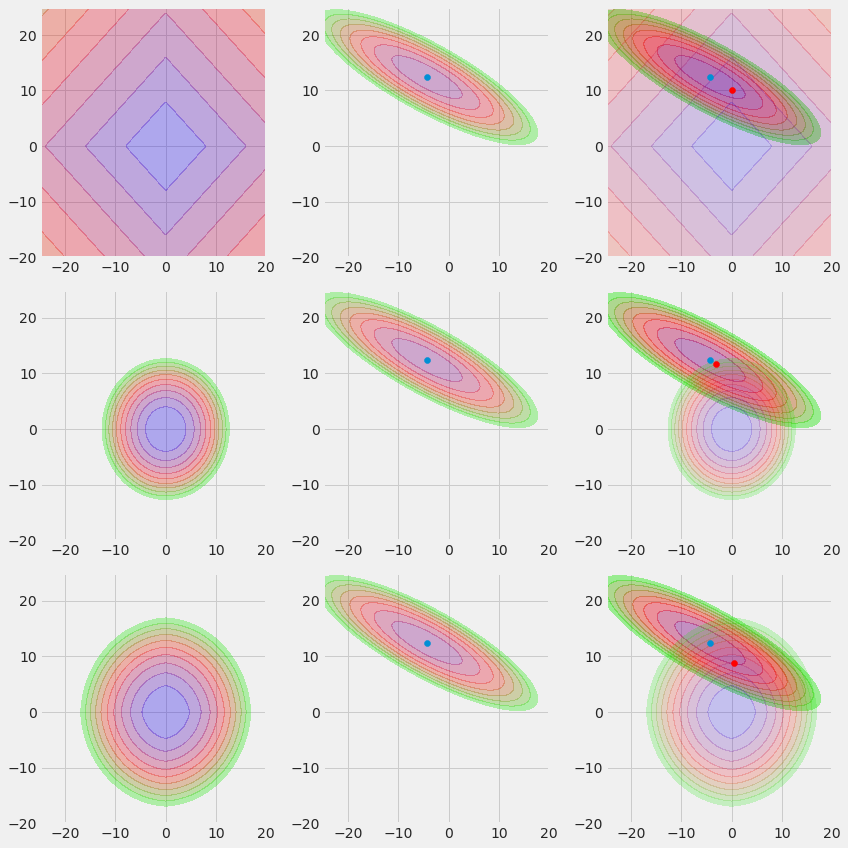

In [5]:
f = plot_surfaces(x, y)

## 4. Scikit-Learn

[Generalized Linear Models](https://scikit-learn.org/stable/modules/linear_model.html)

Please check Aurelién Geron's "Hand-On Machine Learning with Scikit-Learn and Tensorflow" notebook on Linear Models [here](http://nbviewer.jupyter.org/github/ageron/handson-ml/blob/master/04_training_linear_models.ipynb).

## 5. More Resources (advanced!)

[A New Angle on L2 Regularization](https://thomas-tanay.github.io/post--L2-regularization/)

[Two Simple Recipes for Over Fitted Model (Neural Networks)](https://medium.com/@chengweizhang2012/two-simple-recipes-for-over-fitted-model-f35e10c494d7)

#### This material is copyright Daniel Voigt Godoy and made available under the Creative Commons Attribution (CC-BY) license ([link](https://creativecommons.org/licenses/by/4.0/)). 

#### Code is also made available under the MIT License ([link](https://opensource.org/licenses/MIT)).

In [6]:
from IPython.display import HTML
HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>''')